<span style='font-family:Lato'><span style='font-size:110%;'>
    The AIM of our study today is to predict Customer Churn using the <a href = 'https://www.kaggle.com/datasets/bhuviranga/customer-churn-data'>Bank Customer Churn Prediction dataset</a>.Although before that let us understand what customer churn stands for.<br>
    <b>Customer Churn</b> : It is reffered to the phenomenon where customers or subscribers of a business or service discontinue their relationship or stop using the product or service over a certain period of time. This is a Key aspect in business industries as by predicting if the customer will churn or not company can manage the expectations of that customer and avoid future damage.
    </span>

In [1]:
#--Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(context = 'paper', style ='whitegrid', font= 'Georgia', font_scale = 1.2)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<span style='font-family:Lato'><span style='font-size:110%;'>
    Let us understand the dataset properly :-
    <ul><span style='font-family:Lato'><span style='font-size:110%;'>
        <li>'customer_id':ID of the customer.</li>
        <li>'credit_score': Numeric representation of a customer's creditworthiness.</li>
        <li>'country': The country where the customer resides.</li>
        <li>'gender': The gender of the customer.</li>
        <li>'age': The age of the customer.</li>
        <li>'tenure': The length of time the customer has been with the company.</li>
        <li>'balance': The account balance of the customer.</li>
        <li>'products_number': The number of products the customer has with the company.</li>
        <li>'credit_card': Indicates whether the customer has a credit card with the company.</li>
        <li>'active_member': Indicates whether the customer is an active member of the company.</li>
        <li>'estimated_salary': The estimated salary of the customer.</li>
        <li>'churn': Indicates whether the customer has churned or not.1 indicates that the customer has churned and 0 indicates he/she has not.</li>
        </span>

In [2]:
#--Loading the dataset
df = pd.read_csv('/kaggle/input/customer-churn-data/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<span style='font-family:Lato'><span style='font-size:120%;'>
    EXPLORATORY DATA ANALYSIS
    </span>

In [3]:
#--Checking null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [4]:
#--Checking data types
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [5]:
#--Getting value counts for categorical values
for i in ['credit_card', 'active_member','products_number']:
    print(df[i].value_counts())

1    7055
0    2945
Name: credit_card, dtype: int64
1    5151
0    4849
Name: active_member, dtype: int64
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


In [6]:
#--Comverting them into object data type
for i in ['credit_card', 'active_member','products_number']:
        df[i] = df[i].astype('object')

<span style='font-family:Lato'><span style='font-size:110%;'>
    Since, customer_id serves us no purpose we are dropping it.
    </span>

In [7]:
#--Dropping the redundant column
df.drop('customer_id', inplace = True,axis = 1)

<span style='font-family:Lato'><span style='font-size:120%;'>
    DATA VISUALIZATION
    </span>

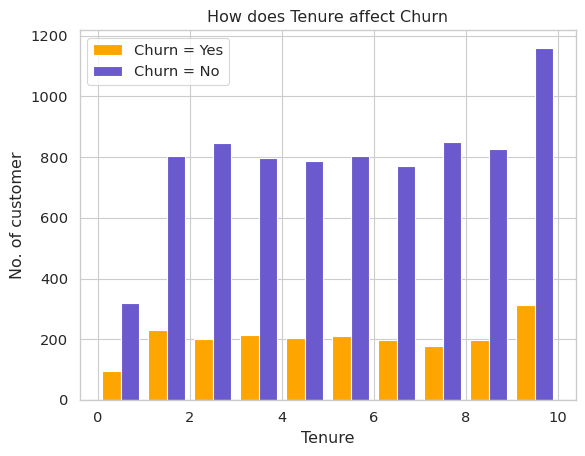

In [8]:
#--How does Tenure affect Churn
tenure_yes = df[df['churn'] == 1].tenure
tenure_no = df[df['churn'] == 0].tenure

plt.hist([tenure_yes,tenure_no], color =['orange','slateblue'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does Tenure affect Churn')
plt.xlabel('Tenure')
plt.ylabel('No. of customer')
plt.show()

<span style='font-family:Lato'><span style='font-size:110%;'>
    By looking at the graph there is no clear indication that customers with more tenure churn less or vise versa.Usually, tenure does affect customer churn however, it is not the case here.
    </span>

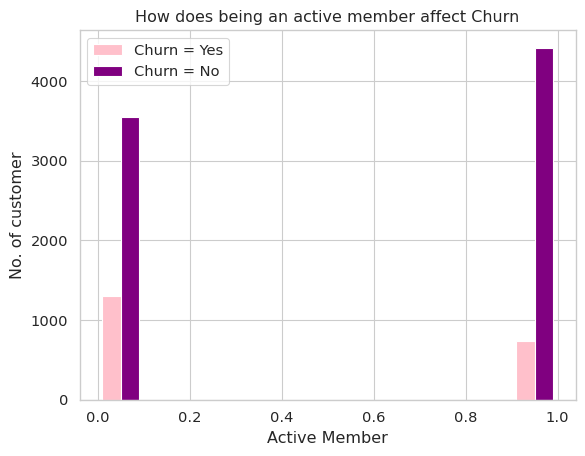

In [9]:
#--How does being an active member affect Churn
member_yes = df[df['churn'] == 1].active_member
member_no = df[df['churn'] == 0].active_member

plt.hist([member_yes,member_no], color =['pink','purple'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does being an active member affect Churn')
plt.xlabel('Active Member')
plt.ylabel('No. of customer')
plt.show()

<span style='font-family:Lato'><span style='font-size:110%;'>
    The graph above suggests that customer who are an active member are less likely to leave, this could be true due to the benefits to being an active member in a bank.
    </span>

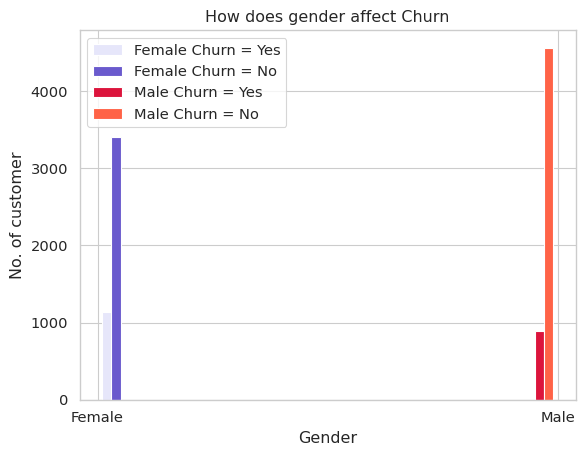

In [10]:
#--How does gender affect Churn

female = df[df['gender'] == 'Female']
male = df[df['gender'] == 'Male']
female_yes = female[female['churn'] == 1].gender
female_no = female[female['churn'] == 0].gender
male_yes = male[male['churn'] == 1].gender
male_no = male[male['churn'] == 0].gender



plt.hist([female_yes,female_no,male_yes,male_no], 
         color =['lavender','slateblue','crimson','tomato'], 
         label=['Female Churn = Yes','Female Churn = No','Male Churn = Yes','Male Churn = No'])
plt.legend()
plt.title('How does gender affect Churn')
plt.xlabel('Gender')
plt.ylabel('No. of customer')
plt.show()

<span style='font-family:Lato'><span style='font-size:110%;'>
    The graph indicates that women are more likely to leave as compared to men. To reason with this we can say factors such as gender-related preferences, life events, or market dynamics may contribute to observed differences in churn rates between genders.</span>

<span style='font-family:Lato'><span style='font-size:120%;'>
    CATEGORICAL ENCODING 
    </span>

<span style='font-family:Lato'><span style='font-size:110%;'>
    Generally, there are two methods to encode categorical data.
    <ul><span style='font-family:Lato'><span style='font-size:110%;'>
        <li> Get Dummies : One-hot encoding creates binary columns for each category, representing the presence or absence of a category.It is suitable for nominal variables with no inherent order, such as the "country" variable. </li>
        <li> Label Encoder : It assigns a unique numerical label to each category in the variable.It is suitable for variables with ordinal relationships, where the order of categories matters (e.g., low, medium, high).</li>
        </span>


In [11]:
#--Examining country column
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [12]:
#--One-Hot Encoding categorical column
df = pd.get_dummies(df, columns = ['country', 'gender'])
df.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


<span style='font-family:Lato'><span style='font-size:120%;'>
    MODEL BUILDING
    </span>

<span style='font-family:Lato'><span style='font-size:110%;'>
    The workflow will be as follows :-
    <ol><span style='font-family:Lato'><span style='font-size:110%;'>
        <li> We are working with categorical prediction which means we need to use Classification ML algorithm. To keep it simple I've only showed the comparision between Decision Trees and Random Forests.</li>
        <li> We'll begin first by splitting the dataset into train , test dataset.</li>
        <li> We'll build a simple Decision Trees model and calculate its predicted values. </li>
        <li> Then we'll try to build a Random Forests model, for this we need the n_estimators i.e. the no. of decision trees we'll be using.</li>
        <li> Now, for this particular step you can use any method such as guessing, although here I've used a simple tactic using the score of the model to decide the value of n_estimators.</li>
        </span>

In [13]:
#--Splitting the model
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(df.drop('churn', axis = 1), df['churn'], random_state = 0, test_size = .30)

In [14]:
#--Building a Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC().fit(X_train,Y_train)

In [15]:
#--Getting Predictions
y_pred = model.predict(x_test)

In [16]:
#--Building Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC

In [17]:
#--For the right value of n_estimators
score = []
for estimators in range(1,10):
    model_rfc = RFC(n_estimators = estimators).fit(X_train,Y_train)
    score.append(model_rfc.score(x_test,y_test))

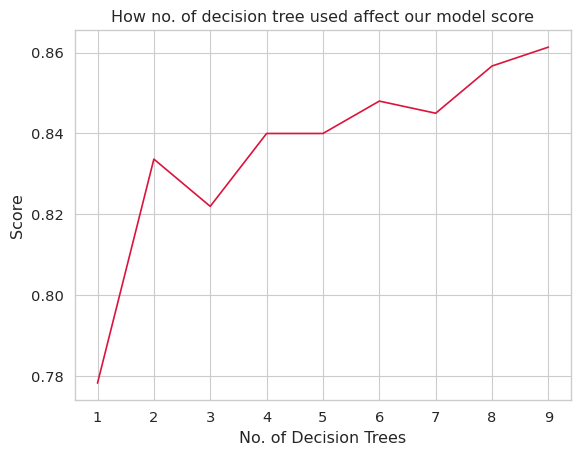

In [18]:
plt.plot(range(1,10), score, color = 'crimson')
plt.title('How no. of decision tree used affect our model score')
plt.xlabel('No. of Decision Trees')
plt.ylabel('Score')
plt.show()

In [19]:
#--Finally building it
model_rfc = RFC(n_estimators = 9).fit(X_train,Y_train)

In [20]:
#--Getting predictions
y_pred_rfc = model_rfc.predict(x_test)

<span style='font-family:Lato'><span style='font-size:120%;'>
    MODEL EVALUATION

In [21]:
#--Evaluation our model
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
#--Classification Report
print(f" Classification Report for Random Forests : \n\n {classification_report(y_test,y_pred_rfc)}" ,
      '\n\n',
       f"Classification Report for Decision Trees : \n\n {classification_report(y_test,y_pred)}")

 Classification Report for Random Forests : 

               precision    recall  f1-score   support

           0       0.88      0.94      0.91      2379
           1       0.68      0.51      0.58       621

    accuracy                           0.85      3000
   macro avg       0.78      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000
 

 Classification Report for Decision Trees : 

               precision    recall  f1-score   support

           0       0.88      0.86      0.87      2379
           1       0.51      0.56      0.53       621

    accuracy                           0.80      3000
   macro avg       0.70      0.71      0.70      3000
weighted avg       0.81      0.80      0.80      3000



Text(48.91666666666667, 0.5, 'Predicted Value')

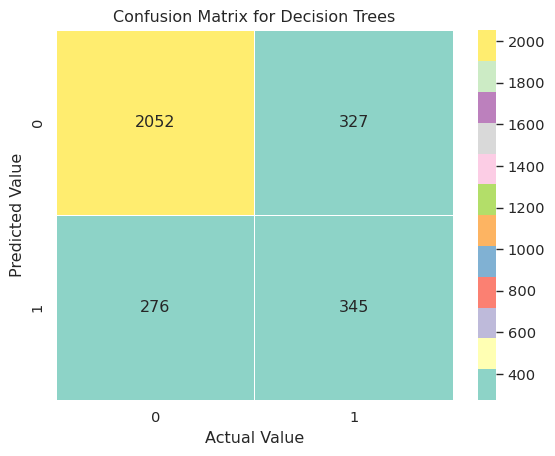

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = 'Set3', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Decision Trees')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

Text(48.91666666666667, 0.5, 'Predicted Value')

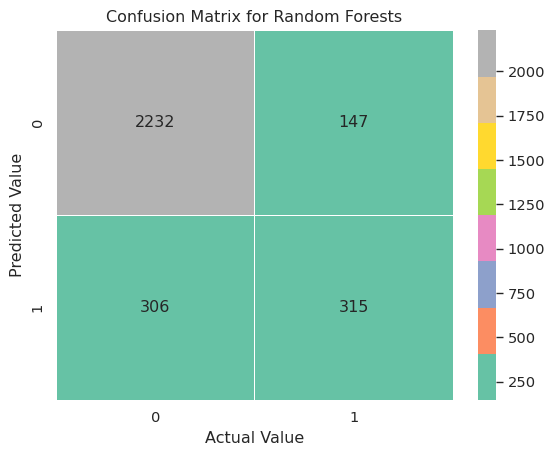

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), cmap = 'Set2', 
            linewidth = 0.5, annot = True, fmt= 'd')
plt.title('Confusion Matrix for Random Forests')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

<span style='font-family:Lato'><span style='font-size:110%;'>
       END-REMARKS
    <ul><span style='font-family:Lato'><span style='font-size:110%;'>
        <li> We started off with our Customer Churn dataset.</li>
        <li> Since, it was clean we didn't waste much time and did EDA encovering insights from our dataset.</li>
        <li> We made two models Decision Trees and Random Forests.</li>
        <li> We found that Random Forests overperformed Decison Trees by a subtle margin.</li>
        <li> Feel free to use any other model for this dataset.However, this model is satisfactory enough.</li>
        </span>
<span style='font-family:Lato'><span style='font-size:130%;'>
<i>Happy Coding :)</i>